# 科学数据处理统计学习指南

统计学习：scikit-learn中的设置和估计对象

In [2]:
from statistics import LinearRegression

from sklearn import datasets

In [3]:
# 鸢尾花
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [4]:
# 数字数据集由1797个8x8手写数字图像组成, 三维数组
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [5]:
import matplotlib.pyplot as plt

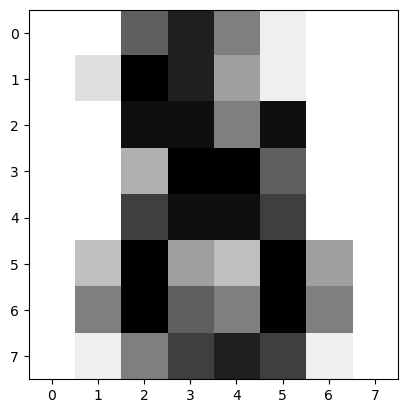

In [6]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [11]:
data = digits.images.reshape((digits.images.shape[0], -1))

有监督的学习：从高维观测值预测输出变量

In [6]:
# 最近邻
import numpy as np
from sklearn import datasets

In [ ]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)
np.random.seed(0)
indices = np.random.permutation(len(iris_y))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
alphas = np.logspace(-4, -1, 6)
knn.fit(iris_X_train, iris_y_train)
print(knn.predict(iris_X_test))
print(iris_y_test)

# 线性模型
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_y_train = diabetes_y[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_test = diabetes_y[-20:]

array([0, 1, 2])

In [17]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(diabetes_X_train, diabetes_y_train)

print(regression.coef_)
# 均方误差
print(np.mean((regression.predict(diabetes_X_test) - diabetes_y_test)**2))
# 解释方差得分：1是完美预测，0表示X和y之间没有线性关系。
regression.score(diabetes_X_test, diabetes_y_test)
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T

regression = linear_model.LinearRegression()

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


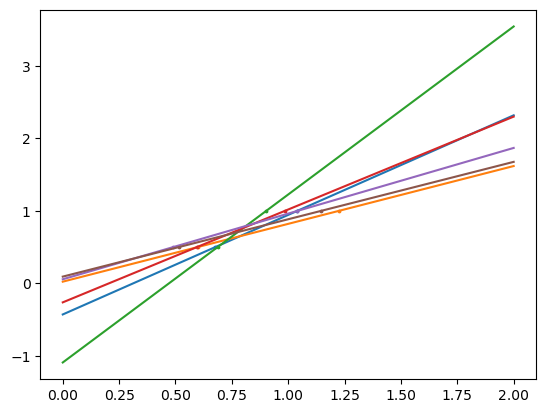

In [22]:
import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regression.fit(this_X, y)
    plt.plot(test, regression.predict(test))
    plt.scatter(this_X, y, s=3)

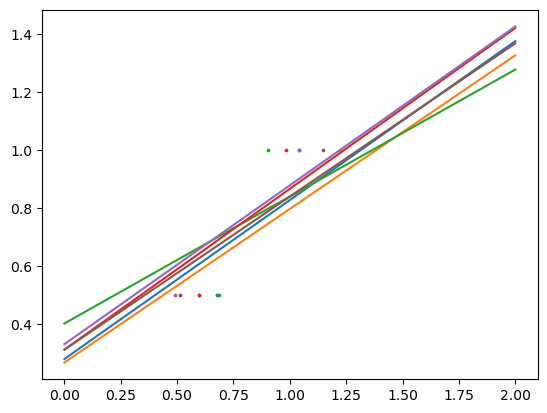

In [23]:
regression = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regression.fit(this_X, y)
    plt.plot(test, regression.predict(test))
    plt.scatter(this_X, y, s=3)

In [27]:
alphas = np.logspace(-4, -1, 6)
print([regression.set_params(alpha=alpha)
      .fit(diabetes_X_train, diabetes_y_train)
      .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

# 稀疏性

alphas = np.logspace(-4, -1, 6)

regression = linear_model.Lasso()
scores = [regression.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
beta_alpha = alphas[scores.index(max(scores))]
regression.alpha = beta_alpha
regression.fit(diabetes_X_train, diabetes_y_train)

print(regression.coef_)
log = linear_model.LogisticRegression(C=1e5)
log.fit(diabetes_X_train, diabetes_y_train)

C:\Users\Kristoff\miniconda3\envs\scikit-learn-tutorial\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [29]:
# 支持向量机

from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]